In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
df.shape

(729322, 11)

In [4]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# Demographic information of Customer & Vendor :-
- id : a unique identifier for each trip

- vendor_id : a code indicating the provider associated with the trip record

- passenger_count : the number of passengers in the vehicle (driver entered value)

## Information about the Trip:
- pickup_longitude : date and time when the meter was engaged

- pickup_latitude : date and time when the meter was disengaged

- dropoff_longitude : the longitude where the meter was disengaged

- dropoff_latitude : the latitude where the meter was disengaged

- store_and_fwd_flag : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

- trip_duration : (target) duration of the trip in seconds

In [5]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


## Some observation about the data:
- The columns id and vendor_id are nominal.
- The columns pickup_datetime and dropoff_datetime are stored as object which must be converted to datetime for better analysis.
- The column store_and_fwd_flag is categorical

In [7]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [8]:
non_num_cols = ['id','pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag']
print(df[non_num_cols].count())

id                    729322
pickup_datetime       729322
dropoff_datetime      729322
store_and_fwd_flag    729322
dtype: int64


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

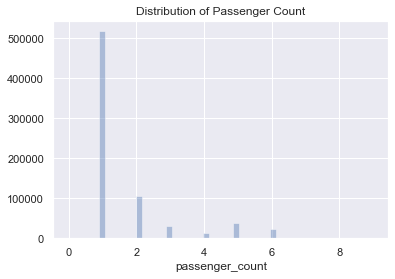

In [10]:
# Passenger Count
sns.distplot(df['passenger_count'], kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In [11]:
df['pickup_datetime'].nunique()

709359

In [12]:
df['dropoff_datetime'].nunique()

709308

In [13]:
df['pickup_day'] = df['pickup_datetime'].dt.day_name()

In [14]:
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

In [15]:
df['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

In [16]:
df['dropoff_day'].value_counts()

Friday       111509
Saturday     110289
Thursday     108918
Wednesday    104944
Tuesday      101142
Sunday        98561
Monday        93959
Name: dropoff_day, dtype: int64

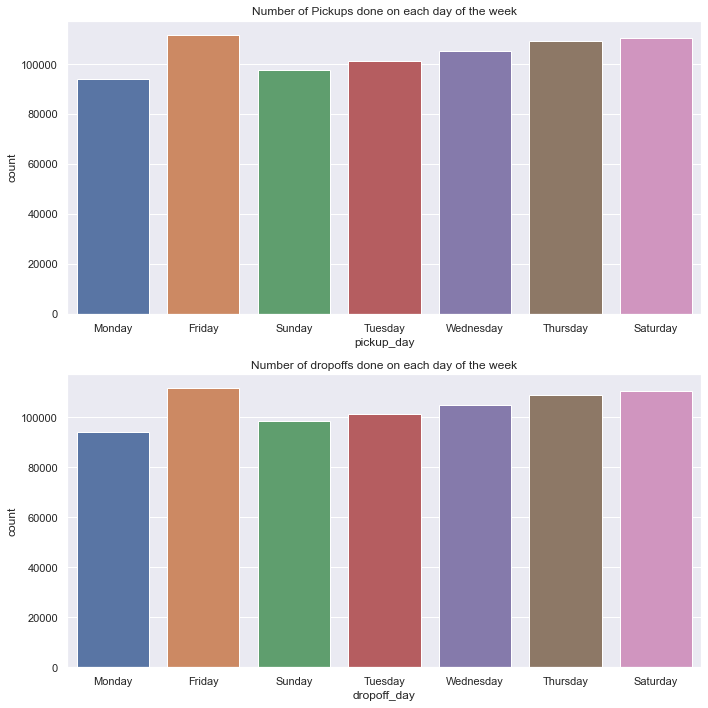

In [17]:
figure,ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
sns.countplot(x='pickup_day', data=df, ax=ax[0])

ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day', data=df, ax=ax[1])

ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [18]:
def timezone(x):
    if x>=datetime.time(4,0,1) and x<=datetime.time(10,0,0):
        return 'morning'
    elif x>=datetime.time(10,0,1) and x<= datetime.time(16,0,0):
        return 'midday'
    elif  x>= datetime.time(16,0,1) and x<=datetime.time(22,0,0):
        return 'evening'
    elif x>=datetime.time(22,0,1) or x <=datetime.time(4,0,0):
        return 'late night'

In [19]:
df['pickup_timezone'] = df['pickup_datetime'].apply(lambda x : timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))

In [20]:
df['dropoff_timezone'] = df['dropoff_datetime'].apply(lambda x : timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))

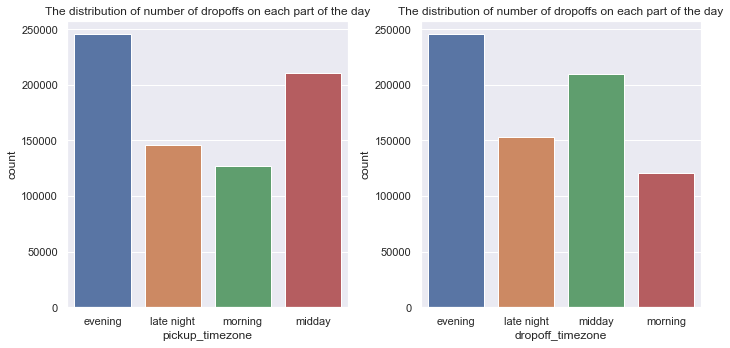

In [21]:
# Distribution of the timezones

figure,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.countplot(x='pickup_timezone', data=df, ax=ax[0])
ax[0].set_title('The distribution of number of dropoffs on each part of the day')

sns.countplot(x='dropoff_timezone', data=df, ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of dropoff hours')

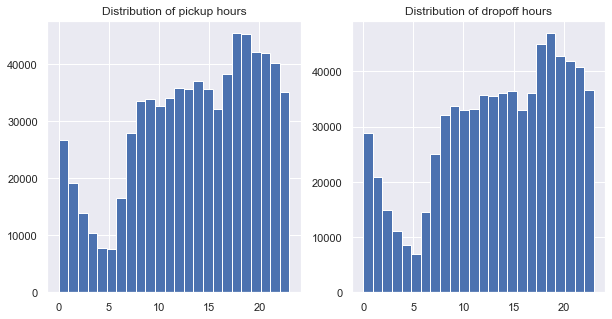

In [22]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24, ax=ax[0])
ax[0].set_title('Distribution of pickup hours')

df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24, ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

In [23]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'The distribution of the Pick Up duration distribution ')

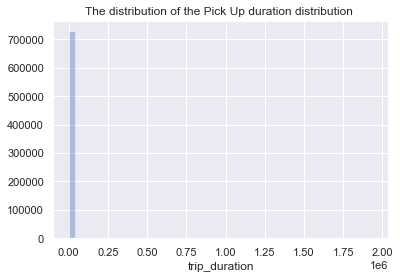

In [24]:
sns.distplot(df['trip_duration'], kde=False)
plt.title('The distribution of the Pick Up duration distribution ')

Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

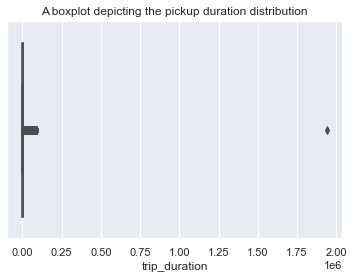

In [25]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

In [26]:
print(df['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


In [27]:
df=df[df.trip_duration!=df.trip_duration.max()]

Text(0.5, 1.0, 'Distribution of the pickup distribution after the treatment of the outliers')

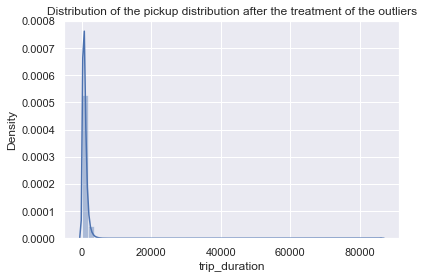

In [28]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup distribution after the treatment of the outliers')

In [29]:
bins = np.array([0,1800,3600,5400,7200,90000])
df['duration_time'] = pd.cut(df.trip_duration, bins, labels=["< 5","5-10", "10-15", "15-20", ">20"])

Text(0.5, 1.0, 'The distribution of Pick Up Longitude')

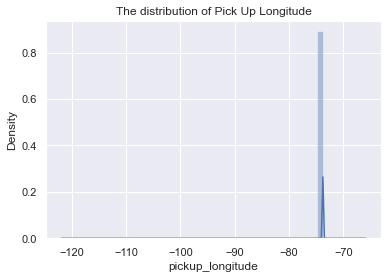

In [30]:
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick Up Longitude')

Text(0.5, 1.0, 'The distribution of Drop off Longitude')

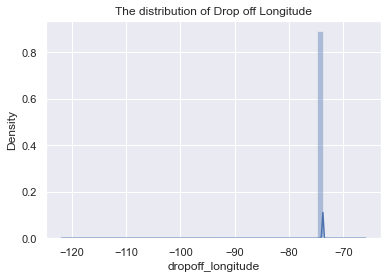

In [31]:
sns.distplot(df['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

Text(0.5, 1.0, 'The distribution of drop off Latitude')

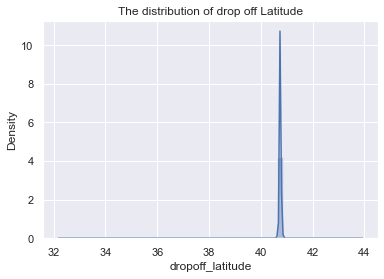

In [32]:
sns.distplot(df['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

Text(0.5, 1.0, 'The distribution of pick up Latitude')

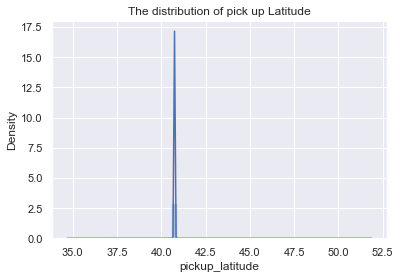

In [33]:
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

<AxesSubplot:>

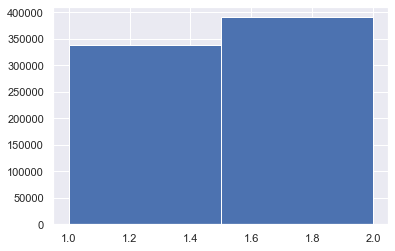

In [34]:
df['vendor_id'].hist(bins=2)

# Bivariate AnalysisLets 
Lets now look the relationship between each of the variables with the target variable trip_duration

## The Relationship between Trip Duration and The day of the week



Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

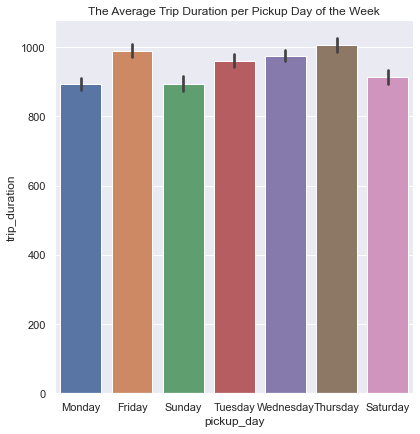

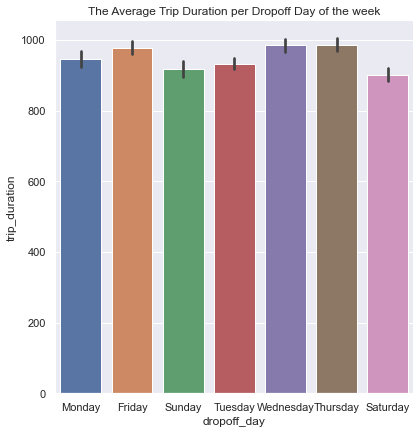

In [35]:
sns.catplot(x="pickup_day", y="trip_duration", kind="bar", data=df, height=6, aspect=1)
plt.title('The Average Trip Duration per Pickup Day of the Week')


sns.catplot(x="dropoff_day", y="trip_duration", kind="bar", data=df, height=6, aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')


In [36]:
## The graph denote the average estimate of a trip for each day of the week. The error bars provides some indication of the uncertainty around that estimate


Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

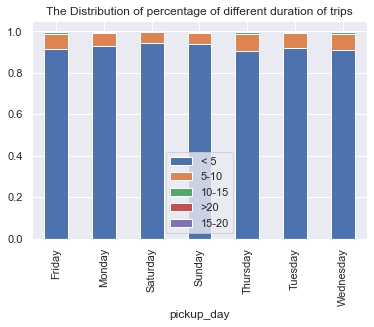

In [37]:
ax1 = df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked="True")
plt.title('The Distribution of percentage of different duration of trips')

In [38]:
# The graph shows a percentage distribution of the trips of differents duration within each day of the week.


Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

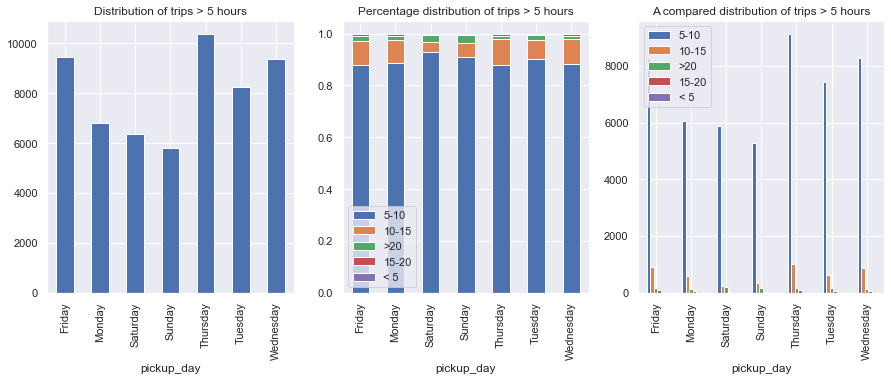

In [39]:
figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax1 = df[ (df.duration_time != "< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar', ax =ax[0])
ax[0].set_title('Distribution of trips > 5 hours')

ax2 = df[ (df.duration_time != "< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True', ax= ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')

ax3 = df[(df.duration_time != "< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar', ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

In [40]:
# The 3 graphs present 3 types of information here:
## The left most graph shows a frequency distribution of the number of trips (>5 hours) taken on each day of the week
## The middle one shows a percentage distribution of the trips of different duration (>5 hours) within each day of the week
## The right one shows the frequency distribution of the trips of different duration (>5 hours) within each day of the week

### The Relationship between Trip Duration and The time of the day

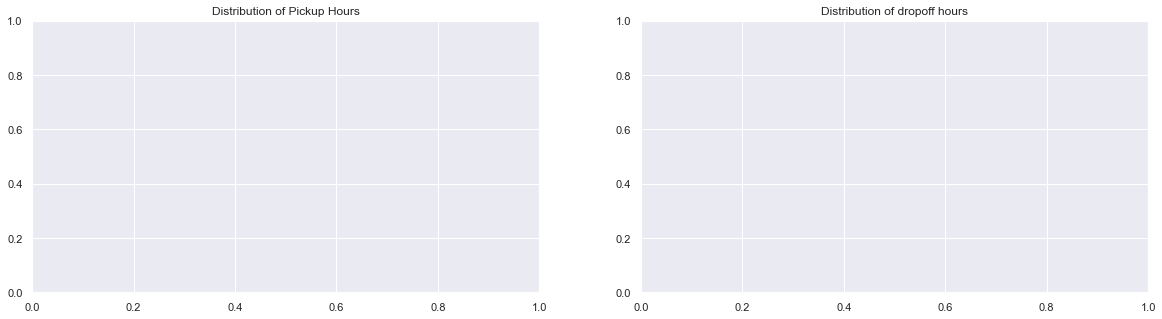

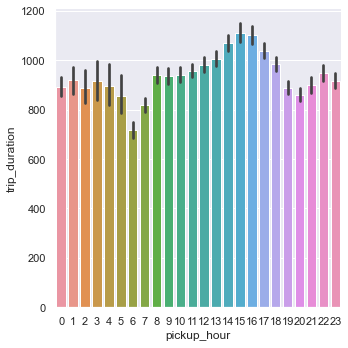

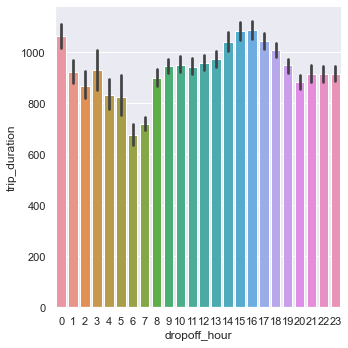

In [41]:
figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

ax1.set_title('Distribution of Pickup Hours')
ax = sns.catplot(x = "pickup_hour", y = "trip_duration", kind='bar', data=df, ax=ax1)

ax2.set_title("Distribution of dropoff hours")
ax=sns.catplot(x="dropoff_hour", y="trip_duration", kind="bar", data=df, ax=ax2)

plt.show()

In [42]:
### The Relationship between passenger count and duration 

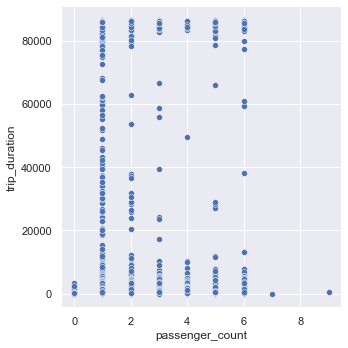

In [43]:
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")

In [44]:
### The Relationship between vendor id and duration

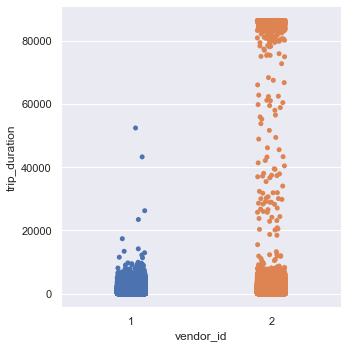

In [45]:
sns.catplot(x='vendor_id', y="trip_duration", kind="strip", data=df)

In [46]:
### The relationship between store forward flag and duration

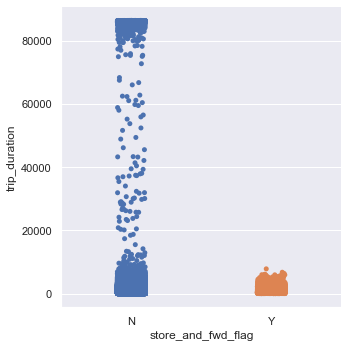

In [47]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip", data=df)

In [48]:
### The relationship between geographical location and duration

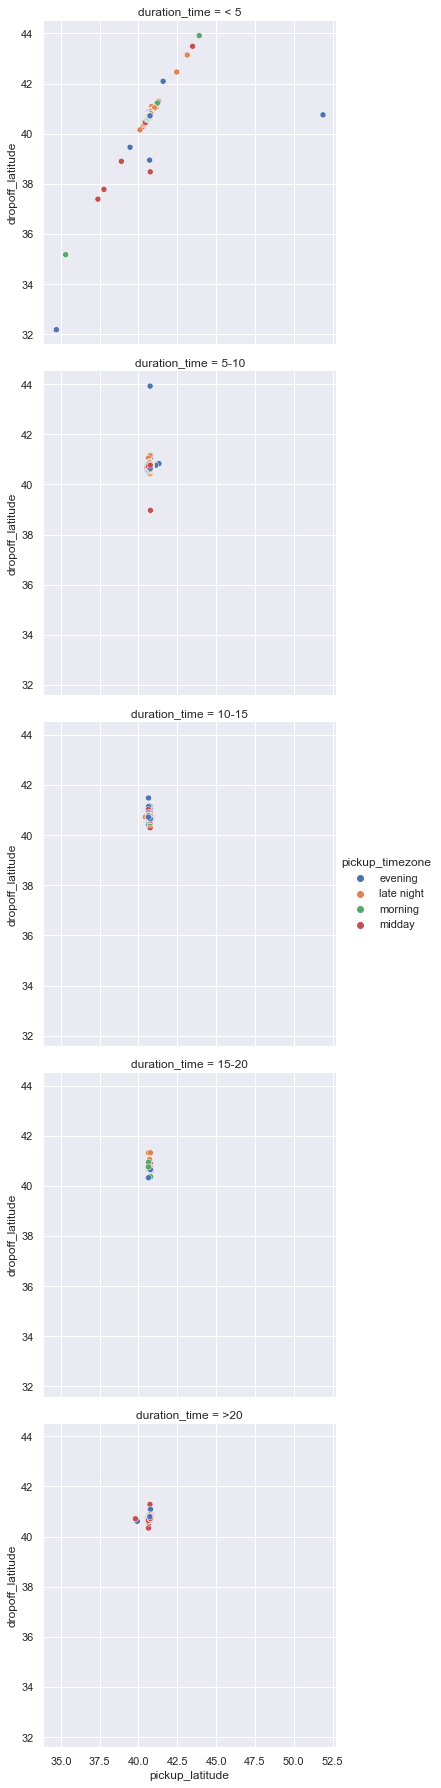

In [49]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude", hue="pickup_timezone", row="duration_time", data=df)

In [50]:
## For shorter Trips (<5 hours), the pickup and dropoff latitude is more or less evenly distributed between 30 and 40 
## For longer trips (>5 hours), the pickup and dropoff lattitude is all concentrated between 40 and 42 degrees. 

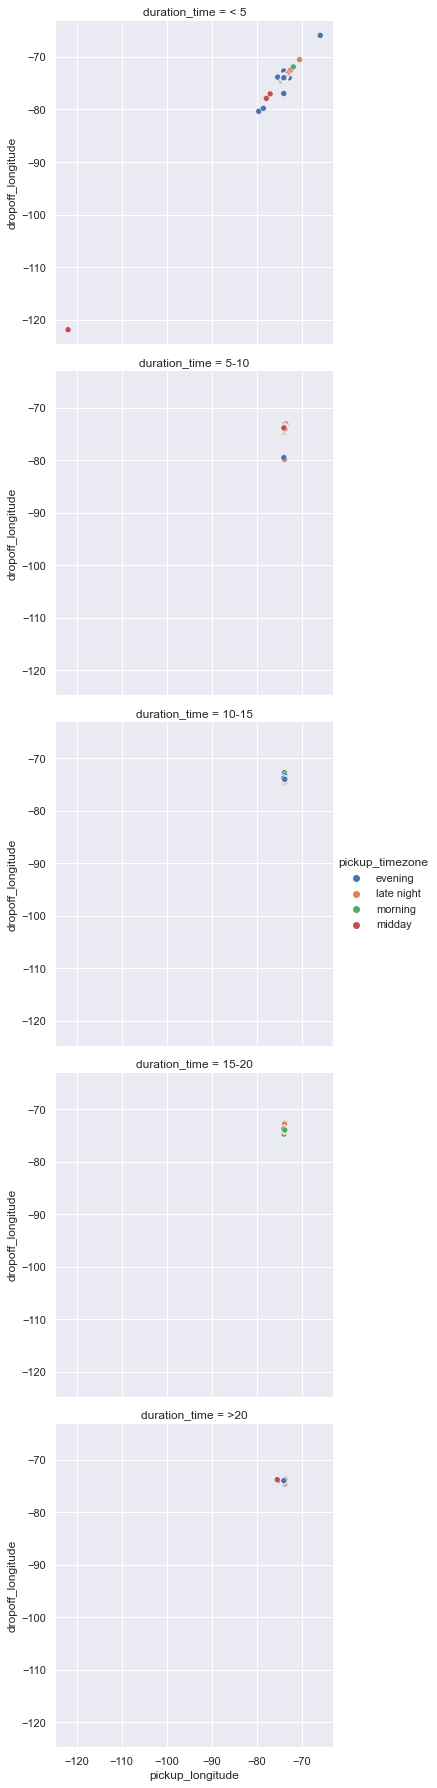

In [51]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude", hue="pickup_timezone", row="duration_time", data=df)

In [52]:
## For shorter trips (<5), the pickup and dropoff longitude is more or less evenly distributed between -80 and - 65 with one outliers near -120.
## For longer trips(>5), the pickup and dropoff longitude is all concentrated near -75

# Conclusion about Trip Duration and the dataset

## Trip Duration varies a lot ranging from few seconds to more than 20 hours
## Most trips are taken on Friday, Saturday and Thursday
## The average duration of a trip is most on Thursday and Friday as trips longer than 5 hours are mostly taken in these days.
## The average duration of trips started in between 14 hours and 17 hours is the largest.
## Vendor 2 mostly provides the longer trips.
## The long duration trips (>5 hours) are mostly concentrated with thier pickup region near (40, 70) to (42, 75)

### Linear Model

In [53]:
# Largest and Smallest occuring trips values 

print('The value of largest 5 trip duration values are as follows : \n {}'.format(df['trip_duration'].nlargest(5)))
print('The the number of rows with 1 as their trip duration values is {}'.format(len(df[df['trip_duration']==1])))

The value of largest 5 trip duration values are as follows : 
 259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
Name: trip_duration, dtype: int64
The the number of rows with 1 as their trip duration values is 13


In [54]:
# We see that there is 1 very large value and 13 values with 1 second as its duration which is absurd. Hence we are dropping these rows.

In [55]:
df= df[df.trip_duration != df.trip_duration.max()]
df = df[df.trip_duration != df.trip_duration.min()]

In [56]:
df['trip_duration_hour'] = df['trip_duration']/3600

In [57]:
df.passenger_count.value_counts()

1    517402
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
7         1
9         1
Name: passenger_count, dtype: int64

In [58]:
# Here the no of records with passenger count 0, 9, and 7 are very small compared to the entire dataset. Hence we will drop the values.

df=df[df.passenger_count<=6]
df=df[df.passenger_count!=0]

In [59]:
# Pickup_datetime and Dropoff_datetime

In [60]:
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month'] = df['dropoff_datetime'].dt.month

In [61]:
df['pickup_month'].value_counts()

3    128307
4    125627
5    124193
2    119354
6    117404
1    114388
Name: pickup_month, dtype: int64

In [62]:
df['dropoff_month'].value_counts()

3    128275
4    125626
5    124229
2    119351
6    117377
1    114362
7        53
Name: dropoff_month, dtype: int64

In [63]:
print(df[df.dropoff_month==7].pickup_datetime.dt.month.value_counts())
print(df[df.dropoff_month==7].pickup_datetime.dt.day.value_counts())

6    53
Name: pickup_datetime, dtype: int64
30    53
Name: pickup_datetime, dtype: int64


In [64]:
# Thus we see that all the pickups were done on 30 th June for drop offs on July... So the data seems fine. 

In [65]:
# Trip Distance , Speed, Time 

In [66]:
#a function is created to calculate the distance from latitudes and longitudes 
from math import radians, cos, sin, asin, sqrt

def haversin(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude
    R = 3959.87433 # This is in miles. For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2- lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

In [67]:
# We will apply this function to each of the rows and create a new feature distance which stores the distance between the pickup and dropoff points in kilometers. 
df['distance'] = df.apply(lambda x : haversin(x), axis = 1)

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

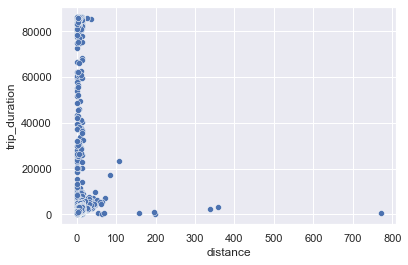

In [68]:
# We will have a look at the distribution of this distance feature against the trip_duration value. 
sns.scatterplot(x='distance', y ='trip_duration', data=df)

In [69]:
# We can see serveral outliers with values much beyond 200 km and my values with trip_distance = 0 km. These may be the rows depicting cancelled rides. 
print("The no of rows with distance = 0 are {}".format(len(df[df.distance==0])))

The no of rows with distance = 0 are 2889


In [70]:
# We will not drop these rows. Rather we will replace these datas with the average distances. 
mean_dist = df['distance'].mean()
df.loc[df['distance']==0, 'distance']= mean_dist

<AxesSubplot:xlabel='speed'>

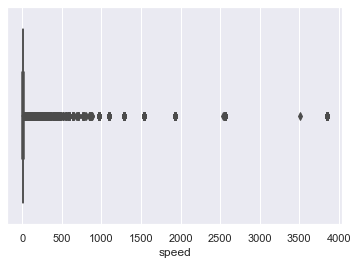

In [71]:
# We will now create a feature called speed. 
df['speed'] = df['distance']/ df['trip_duration_hour']
sns.boxplot(df['speed'])

<AxesSubplot:xlabel='distance', ylabel='trip_duration_hour'>

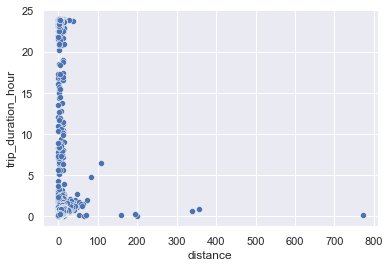

In [72]:
sns.scatterplot(x='distance', y='trip_duration_hour', data=df)

In [73]:
# Here  we see several data points where the distance is < 20 km and the time taken to be >10 hours. This is very absurd as the avg speed is 11 km/hour. These might to be due to extreme road congestion. Lets log transform these columns and have a look at the distribution again.

In [74]:
df['log_distance'] = np.log(df.distance)
df['log_trip_duration'] = np.log(df.trip_duration_hour)

<AxesSubplot:xlabel='log_distance', ylabel='log_trip_duration'>

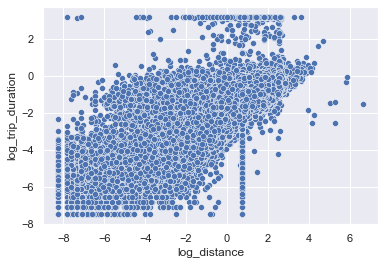

In [75]:
sns.scatterplot(x='log_distance', y='log_trip_duration', data=df)

In [76]:
# Here we see that the log transformed value of trip duration and distance has somewhat linear relationship. But still there are some anamalous data points where the duration value is not change in distance. 

## We will thus drop the rows beyond log_trip_duration > 2

In [77]:
df=df[df.log_trip_duration<2]

In [78]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_timezone',
       'dropoff_timezone', 'pickup_hour', 'dropoff_hour', 'duration_time',
       'trip_duration_hour', 'pickup_month', 'dropoff_month', 'distance',
       'speed', 'log_distance', 'log_trip_duration'],
      dtype='object')

In [79]:
data2 = df.loc[:, ['passenger_count', 'store_and_fwd_flag', 'trip_duration','pickup_day','dropoff_day', 'pickup_month','dropoff_month', 'pickup_timezone', 'dropoff_timezone', 'speed', 'log_distance', 'distance']]

In [80]:
# We will now transform the categorical features from data2 dataframe through one hot encoding.
data2 = pd.get_dummies(data2, columns=['store_and_fwd_flag','pickup_day','dropoff_day', 'pickup_month', 'dropoff_month', 'pickup_timezone', 'dropoff_timezone'])

In [81]:
data2

,passenger_count,trip_duration,speed,log_distance,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,...,dropoff_month_6,dropoff_month_7,pickup_timezone_evening,pickup_timezone_late night,pickup_timezone_midday,pickup_timezone_morning,dropoff_timezone_evening,dropoff_timezone_late night,dropoff_timezone_midday,dropoff_timezone_morning
0,1,400,6.707517,-0.293996,0.745280,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2,1100,8.399243,0.942518,2.566436,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,1635,9.922969,1.505561,4.506682,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,6,1141,4.630251,0.383582,1.467532,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,848,11.421451,0.989685,2.690386,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,296,8.468160,-0.362016,0.696271,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
729318,1,315,5.176274,-0.792031,0.452924,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
729319,1,673,7.642893,0.356832,1.428796,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
729320,1,447,4.236441,-0.642407,0.526025,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [82]:
base_line_col = ['distance']

In [83]:
# creating Predicting Cols
predictor_cols=['passenger_count','distance','store_and_fwd_flag_N','store_and_fwd_flag_Y',
               'pickup_day_Friday','pickup_day_Monday','pickup_day_Saturday','pickup_day_Sunday',
               'pickup_day_Thursday','pickup_day_Tuesday','pickup_day_Wednesday','dropoff_day_Friday',
               'dropoff_day_Monday','dropoff_day_Saturday','dropoff_day_Sunday','dropoff_day_Thursday',
               'dropoff_day_Tuesday','dropoff_day_Wednesday','pickup_month_1','pickup_month_5','pickup_month_6',
               'dropoff_month_1','dropoff_month_5','dropoff_month_6','pickup_timezone_late night',
               'pickup_timezone_midday','pickup_timezone_morning','dropoff_timezone_evening',
               'dropoff_timezone_late night','dropoff_timezone_midday','dropoff_timezone_morning']

In [84]:
# Listing Targeting Columns 
target_col=['trip_duration']

In [85]:
# Creating Models Functions for differents Algorithms
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def modelfit(estimator, data_train, data_test, predictors, target):
    #print(data_train.head())
    #fitting model
    estimator.fit(data_train[predictors], data_train.loc[:, target])
    #train data prediction
    train_pred = estimator.predict(data_train[predictors])
    #cross_validation score
    cv_score=cross_val_score(estimator, data_train[predictors], data_train.loc[:,target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    #Print model report :
    print("\n Model Report : ")
    print("RMSE on Train Data: %.4g" % np.sqrt(metrics.mean_squared_error(data_train.loc[:,target].values, train_pred)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" %(np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    test_pred= estimator.predict(data_test[predictors])
    print(metrics.mean_squared_error(data_test.loc[:,target].values, test_pred))
    return test_pred

In [86]:
# Spliting Test And Train Data 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
validation_size = 0.20
seed = 7
X_train, X_test = train_test_split(data2, test_size= validation_size, random_state=seed)

In [87]:
# Finding Mean Predictings 
mean_pred=np.repeat(X_train[target_col].mean(), len(X_test[target_col]))
from sklearn.metrics import mean_squared_error as mae
sqrt(mae(X_test[target_col], mean_pred))

664.1583834380903

In [88]:
# Feeding the data to the model function with frist algorithms 
alg1 = LinearRegression(normalize=True)
print('The baseline model')
y_pred = modelfit(alg1, X_train, X_test, base_line_col, target_col)
coef1 = alg1.coef_
print('The coefficient is {}'.format(coef1))

The baseline model

 Model Report : 
RMSE on Train Data: 463
CV Score : Mean - 461.4 | Std - 47.83 | Min - 420.1 | Max - 592.6
333599.38343377976
The coefficient is [[187.7810396]]



 Model Report : 
RMSE on Train Data: 448.7
CV Score : Mean - 447 | Std - 49.48 | Min - 404.9 | Max - 582.3
321635.29968330776


<AxesSubplot:title={'center':'Model Coefficients'}>

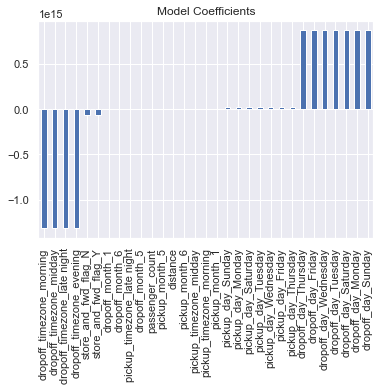

In [89]:
alg2 = LinearRegression(normalize=True)
y_pred = modelfit(alg2, X_train, X_test, predictor_cols, target_col)
coef1 = pd.Series(alg2.coef_[0], predictor_cols).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## Predicition using Decision Trees 

In [90]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

In [91]:
# Importing Data 
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [92]:
# Describing Data Set 
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [93]:
# Creating the derivative data form Datetime with pandas . 
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

In [94]:
# The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e.
df_y = np.log(data['trip_duration'])

Creating different variables for the proper analysing of the data 

In [95]:
data.loc[:, 'pickup_weekday'] = data['pickup_datetime'].dt.weekday

In [96]:
data.loc[:, 'pickup_weekofyear'] = data['pickup_datetime'].dt.weekofyear
data.loc[:, 'pickup_hour'] = data['pickup_datetime'].dt.hour
data.loc[:, 'pickup_minute'] = data['pickup_datetime'].dt.minute
data.loc[:, 'pickup_minute'] = data['pickup_datetime'].dt.minute
data.loc[:, 'pickup_dt'] = (data['pickup_datetime'] - data['pickup_datetime'].min()).dt.total_seconds()
data.loc[:, 'pickup_week_hour'] = data['pickup_weekday'] * 24 + data['pickup_hour']

#### Euclidean distance

In [97]:
y_dist = data['pickup_longitude'] - data['dropoff_longitude']
x_dist = data['pickup_latitude'] - data['dropoff_latitude']
data['dist_sq']  = (y_dist ** 2 ) + (x_dist ** 2)
data['dist_sq']  = data['dist_sq'] ** 0.5

#### Haversine Distance

In [98]:
# Declaring the various function for the Harvesive Distance
def harvesine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat *0.5) **2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng *0.5) **2
    h = 2 * AVG_EARTH_RADIUS + np.arcsin(np.sqrt(d))
    return h
# For Calculating the Direction
def direction_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng1))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan(y,x))

In [99]:
# Calculating the Harvesine distance
data['harvesine_distance'] = harvesine_array(data['pickup_latitude'].values, data['pickup_longitude'].values, data['dropoff_latitude'].values, data['dropoff_longitude'].values)
data['direction'] = direction_array(data['pickup_latitude'].values, data['pickup_longitude'].values, data['dropoff_latitude'].values, data['dropoff_longitude'].values)

In [100]:
#Binning

data['pickup_latitude_round3'] = np.round(data['pickup_latitude'], 3)
data['pickup_longitude_round3'] = np.round(data['pickup_longitude'], 3)

data['dropoff_latitude_round3'] = np.round(data['dropoff_latitude'], 3)
data['dropoff_longitude_round3'] = np.round(data['dropoff_longitude'], 3)

In [101]:
# Proper indexing of the data 
data['vendor_id'] = data['vendor_id'] -1

In [102]:
# finding and calculating null values 
np.sum(pd.isnull(data))

id                          0
vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
pickup_weekday              0
pickup_weekofyear           0
pickup_hour                 0
pickup_minute               0
pickup_dt                   0
pickup_week_hour            0
dist_sq                     0
harvesine_distance          0
direction                   0
pickup_latitude_round3      0
pickup_longitude_round3     0
dropoff_latitude_round3     0
dropoff_longitude_round3    0
dtype: int64

In [103]:
# filling Null Values if There are some 
data.fillna(0, inplace=True)

In [104]:
# Droping cols which are not required 
data = data.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration', 'store_and_fwd_flag'], axis=1)

In [105]:
# Importing Libraries 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [106]:
# Spliting Train And Test Data 
xtrain, xtest, ytrain, ytest = train_test_split(data, df_y, test_size=1/3, random_state=0)

In [107]:
# Calculating Predictions
mean_pred = np.repeat(ytrain.mean(), len(ytest))
sqrt(mean_squared_error(ytest, mean_pred))

0.8026060258650528

In [108]:
# Function for Calculating CV_score for any various ml_model
def cv_score(ml_model, rstate=11, cols = data.columns):
    i = 1
    cv_scores = []
    df1 = data.copy()
    df1 = data[cols]
    
    kf = KFold(n_splits=5, random_state=rstate, shuffle=True)
    
    for train_index, test_index in kf.split(df1, df_y):
        print('\n {} of Kfold {}'.format(i, kf.n_splits))
        xtr, xvl = df1.loc[train_index], df1.loc[test_index]
        ytr, yvl = df_y[train_index], df_y[test_index]
        
        model = ml_model
        model.fit(xtr, ytr)
        train_val = model.predict(xtr)
        pred_val = model.predict(xvl)
        
        rmse_score_train = sqrt(mean_squared_error(ytr, train_val))
        rmse_score = sqrt(mean_squared_error(yvl, pred_val))
        suffix = ""
        msg = ""
        
        msg += "Valid RMSE: {:5f}".format(rmse_score)
        print(msg)
        
        cv_scores.append(rmse_score)
        i += 1
    return cv_scores

In [109]:
# CV_score for LinearRegressions 
linreg_score = cv_score(LinearRegression())


 1 of Kfold 5
Valid RMSE: 0.642333

 2 of Kfold 5
Valid RMSE: 0.637824

 3 of Kfold 5
Valid RMSE: 1.014804

 4 of Kfold 5
Valid RMSE: 0.651147

 5 of Kfold 5
Valid RMSE: 0.663225


In [110]:
# CV_score for the Dicision Trees Regressors 
dtree_score = cv_score(DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25))


 1 of Kfold 5
Valid RMSE: 0.441839

 2 of Kfold 5
Valid RMSE: 0.443385

 3 of Kfold 5
Valid RMSE: 0.434106

 4 of Kfold 5
Valid RMSE: 0.438765

 5 of Kfold 5
Valid RMSE: 0.439426


In [111]:
# Creating DataFrame for the Both the results with Linear Regressor and Decision Trees 
results_df = pd.DataFrame({'Linear_regression':linreg_score, 'decision_tree': dtree_score})

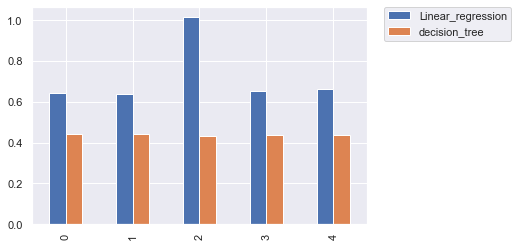

In [112]:
# Plotting Data 
results_df.plot(y=['Linear_regression', 'decision_tree'], kind='bar', legend=False)
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad = 0.)
plt.show()

In [113]:
#Importing Libraries 
from sklearn import tree

In [114]:
# Dicision Trees Model trainging and Model Fitting 
dtree = DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25)
dtree.fit(xtrain, ytrain)

DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25)

In [115]:

DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25)

DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25)

In [119]:
# Creating Dot File of the Decisions Trees into a .Dot file  and Then into Png 
decision_tree = tree.export_graphviz(dtree, out_file='tree.dot', feature_names=xtrain.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png